In [1]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [3]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [4]:
specification = specs.CoiledCoil.from_parameters

In [5]:
sequences = ['GEIAALKQEIAALKKENAALKWEIAALKQGYY', 'GEIAALKQEIAALKKENAALKWEIAALKQGYY', 'GEIAALKQEIAALKKENAALKWEIAALKQGYY']

In [17]:
parameters = [
    Parameter.static('Oligomeric State', 3),
    Parameter.static('Helix Length', 32),
    Parameter.dynamic('Radius', 6.0, 1.0),
    Parameter.dynamic('Pitch', 200, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['f'], 27),  
]

In [18]:
default_values = [x.default_value for x in parameters]
print(default_values)

[3, 32, 6.0, 200, 154.2]


In [19]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [20]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [21]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max    
0  	61   	-1265.69	237.363	-1704.13	-835.47
1  	73   	-1464.77	134.923	-1719.65	-1212.55
2  	75   	-1583.35	69.4464	-1719.65	-1429.57
3  	82   	-1631.95	37.6215	-1719.65	-1554.7 
4  	79   	-1663.57	21.6335	-1724.88	-1624.01
5  	74   	-1681.4 	15.2527	-1726.32	-1659.63
6  	87   	-1692.45	11.1335	-1726.32	-1674.97
7  	80   	-1698.95	11.5794	-1726.39	-1684.27
8  	59   	-1706.57	12.0798	-1726.63	-1693.31
9  	63   	-1714.93	9.84414	-1726.63	-1694.34
10 	75   	-1721.94	3.81711	-1726.94	-1713.42
11 	65   	-1724.21	2.38059	-1726.95	-1719.05
12 	72   	-1726.04	0.704204	-1726.95	-1723.83
13 	66   	-1726.51	0.203656	-1726.97	-1726.04
14 	70   	-1726.69	0.123655	-1727   	-1726.49
15 	56   	-1726.76	0.114322	-1727.07	-1726.55
16 	68   	-1726.83	0.101097	-1727.12	-1726.66
17 	71   	-1726.88	0.102544	-1727.12	-1726.73
18 	77   	-1726.96	0.0896378	-1727.21	-1726.81
19 	71   	-1727.02	0.0879907	-1727.31	-1726.9 
20 	62   	-1727.06	0.0788906	-1727.31	-1726.94


In [27]:
optimized_model_ga = opt_ga.best_model

In [28]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-1727.5821940050437

In [29]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [30]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

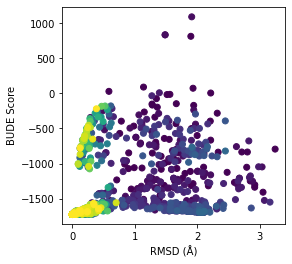

In [31]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('ga.png')

In [32]:
f = open('d_CC-Di_trimer-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [33]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [34]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg     	std   	min    	max     
0  	100  	-1211.95	316.13	-1655.1	-57.2205
1  	100  	-1346.57	232.323	-1666.55	-186.488
2  	100  	-1438.59	187.605	-1667.12	-186.488
3  	100  	-1518.62	116.293	-1718.03	-1137.8 
4  	100  	-1573.42	90.2058	-1718.03	-1308.67
5  	100  	-1609.47	69.4443	-1722.19	-1345.76
6  	100  	-1638.05	51.1388	-1722.19	-1395.93
7  	100  	-1657.17	37.7864	-1722.19	-1540.89
8  	100  	-1670.68	27.6763	-1722.56	-1608.98
9  	100  	-1680.41	27.2387	-1725.75	-1608.98
10 	100  	-1690.04	22.653 	-1725.75	-1621.75
11 	100  	-1699.85	17.3684	-1725.75	-1657.31
12 	100  	-1706.91	14.7974	-1725.75	-1657.31
13 	100  	-1712.57	11.5129	-1725.75	-1673.69
14 	100  	-1716.03	8.7881 	-1726.12	-1687.74
15 	100  	-1719.15	5.80152	-1726.81	-1694.2 
16 	100  	-1720.75	4.26246	-1727.5 	-1697.54
17 	100  	-1722.15	2.74719	-1727.5 	-1706.08
18 	100  	-1722.76	1.98856	-1727.5 	-1715.2 
19 	100  	-1723.31	1.70695	-1727.5 	-1718.06
20 	100  	-1723.53	1.61282	-1727.5 	-1719.04
21 	100  	-172

In [35]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-1728.9969136908499

In [36]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [37]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

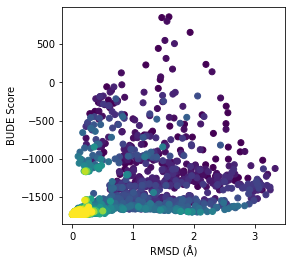

In [38]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('de.png')

In [39]:
f = open('d_CC-Di_trimer-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [40]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [41]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max    
0  	100  	-779.537	548.064	-1763.45	554.746
1  	76   	-1059.88	589.602	-1763.45	293.894
2  	54   	-1237.85	493.76 	-1763.45	293.894
3  	44   	-1273.25	454.617	-1763.45	-52.4104
4  	60   	-1173.1 	544.444	-1731.91	-30.4013
5  	56   	-1243.13	517.832	-1770.47	513.928 
6  	61   	-1254.19	471.265	-1770.47	513.928 
7  	88   	-1261.08	411.207	-1727.34	-73.4896
8  	79   	-1170.31	459.173	-1732.03	113.481 
9  	46   	-1168.46	459.931	-1769.02	113.481 
10 	51   	-1201.76	427.588	-1769.02	355.934 
11 	84   	-1216.41	388.626	-1689.83	-194.078
12 	80   	-1108.24	506.916	-1751.63	235.09  
13 	53   	-1062.75	573.627	-1751.63	1153.03 
14 	26   	-1030.89	630.091	-1751.63	1153.03 
15 	26   	-1057.12	622.989	-1751.63	1153.03 
16 	49   	-1163.92	559.64 	-1746.64	734.483 
17 	60   	-1094.83	576.929	-1755.48	323.976 
18 	50   	-1335.58	434.821	-1755.77	323.976 
19 	59   	-989.207	630.314	-1755.77	1542.07 
20 	83   	-782.241	604.937	-1728.37	1542.07 
21 	85   	-114

In [42]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-1770.4738151751562

In [43]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [44]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

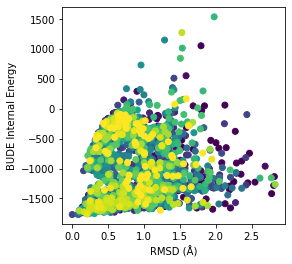

In [45]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Internal Energy')

fig.savefig('pso.png')

In [46]:
f = open('d_CC-Di_trimer-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [47]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [48]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max    
0  	100  	-674.051	394.037	-1432.19	472.455
1  	100  	-845.473	464.53 	-1559.6 	625.662
2  	100  	-1087.78	385.759	-1623.45	-61.5354
3  	100  	-1194.84	455.92 	-1683.65	416.01  
4  	100  	-1337.79	342.26 	-1624.26	-188.18 
5  	100  	-1510.83	230.237	-1673.82	-362.474
6  	100  	-1569.92	198.046	-1686.45	-456.021
7  	100  	-1341.58	501.73 	-1688.22	-211.726
8  	100  	-1543.38	295.76 	-1696.9 	-367.06 
9  	100  	-1487.09	371.054	-1703.83	-429.943
10 	100  	-1501.06	344.742	-1703.2 	-814.851
11 	100  	-1551.07	313.525	-1704.89	-794.364
12 	100  	-1559.11	306.567	-1705.46	-826.162
13 	100  	-1630.86	224.99 	-1706.54	-855.825
14 	100  	-1644.15	209.824	-1708.18	-858.836
15 	100  	-1509.95	348.776	-1707.74	-845.736
16 	100  	-1641.46	215.261	-1707.91	-853.076
17 	100  	-1563.73	302.458	-1708.03	-855.176
18 	100  	-1567.52	303.015	-1708.48	-848.363
19 	100  	-1559.4 	312.086	-1708.34	-850.976
20 	100  	-1583.81	288.844	-1708.4 	-852.435
21 	100  	-16

In [49]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-1708.888540273089

In [50]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [51]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

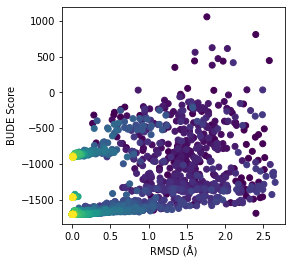

In [52]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('cmaes.png')

In [53]:
f = open('d_CC-Di_trimer-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)